In [11]:
import pandas as pd
import numpy as np
url=r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\8th and 9th November\4. Logistic Regresssion\bank-full.csv"
data=pd.read_csv(url,sep=';')
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [12]:
data.shape

(45211, 17)

In [13]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
data['y'].value_counts

<bound method IndexOpsMixin.value_counts of 0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object>

In [17]:
data.corr(numeric_only="yes")

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [32]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [35]:
#sampling
#X=data_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       #'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
      # 'previous', 'poutcome']]
#y=data_encoded["y"]
y = data_encoded['y_yes']
X = data_encoded.drop('y_yes', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((31647, 42), (13564, 42))

In [36]:
y_train.shape,y_test.shape

((31647,), (13564,))

In [37]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,40,580,16,192,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
9928,47,3644,9,83,2,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
33409,25,538,20,226,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31885,42,1773,9,311,1,336,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15738,56,217,21,121,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,46,2800,5,47,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
380,38,757,6,133,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
7713,41,4539,30,298,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
12188,41,1309,20,28,4,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [50]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)
#training
model.fit(X_train,y_train)
#prediction
pred=model.predict(X_test)
pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False, False, False, ..., False, False, False], shape=(13564,))

In [51]:
y_test

3776     False
9928     False
33409    False
31885    False
15738    False
         ...  
9016     False
380      False
7713     False
12188    False
28550    False
Name: y_yes, Length: 13564, dtype: bool

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt

In [53]:
cf=confusion_matrix(y_test,pred,labels=model.classes_)
cf

array([[11659,   307],
       [ 1051,   547]])

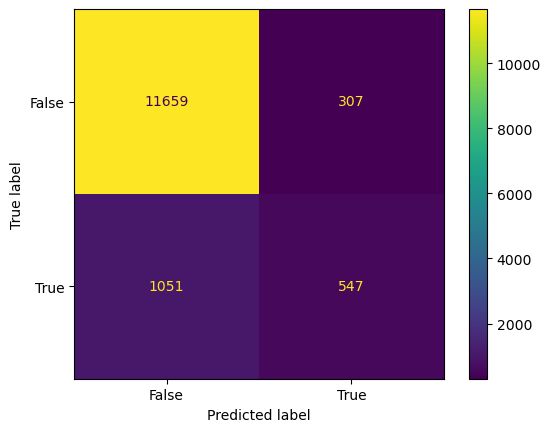

In [54]:
cfd=ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [55]:
accuracy_score(y_test,pred)*100

89.988204069596

In [56]:
#scaling and transformation

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled

array([[-0.46479895, -0.45618549,  0.14061876, ..., -0.20912213,
        -0.18506616,  0.47270575],
       [ 1.41634262, -0.39034358,  0.38091476, ..., -0.20912213,
        -0.18506616,  0.47270575],
       [ 0.47577183, -0.45618549, -1.30115725, ..., -0.20912213,
        -0.18506616,  0.47270575],
       ...,
       [-0.65291311, -0.01376817, -0.09967724, ..., -0.20912213,
        -0.18506616,  0.47270575],
       [-0.74697019, -0.40075735, -1.06086125, ..., -0.20912213,
        -0.18506616,  0.47270575],
       [-0.2766848 , -0.46995854,  0.62121076, ..., -0.20912213,
        -0.18506616,  0.47270575]], shape=(31647, 42))

In [58]:
X_test_scaled=sc.fit_transform(X_test)
X_test_scaled

array([[-0.08722075, -0.24777589,  0.02977146, ..., -0.19846152,
        -0.18799153,  0.47208402],
       [ 0.57391891,  0.7104607 , -0.81152046, ..., -0.19846152,
        -0.18799153,  0.47208402],
       [-1.50394859, -0.26091099,  0.51050971, ..., -0.19846152,
        -0.18799153,  0.47208402],
       ...,
       [ 0.00722778,  0.99036336,  1.71235532, ..., -0.19846152,
        -0.18799153,  0.47208402],
       [ 0.00722778, -0.01978814,  0.51050971, ..., -0.19846152,
        -0.18799153,  0.47208402],
       [ 1.51840414, -0.11142108,  1.59217076, ..., -0.19846152,
        -0.18799153, -2.11826698]], shape=(13564, 42))

In [59]:
l=LogisticRegression()
l.fit(X_train_scaled,y_train)
pred1=l.predict(X_test_scaled)
pred1

array([False, False, False, ..., False, False, False], shape=(13564,))

In [60]:
cf=confusion_matrix(y_test,pred,labels=model.classes_)
cf

array([[11659,   307],
       [ 1051,   547]])

In [62]:
accuracy_score(y_test,pred1)*100

89.98083161309349

In [63]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
X_train_scaled=mx.fit_transform(X_train)
X_test_scaled=mx.fit_transform(X_test)
l2=LogisticRegression()
l2.fit(X_train_scaled,y_train)
pred2=l2.predict(X_test_scaled)
pred2

array([False, False, False, ..., False, False, False], shape=(13564,))

In [65]:
accuracy_score(y_test,pred2)*100

90.07667354762607

In [66]:
from sklearn.neighbors import KNeighborsClassifier
def knn_classification(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred_3=knn.predict(X_test)
    acc=accuracy_score(y_test,pred_3)
    return acc
acc=knn_classification(X_train,X_test,y_train,y_test)
acc*100

87.91654379239162

In [ ]:
#Logistic Regression with Min-Max Scaling achieved the highest accuracy (90.07%) and was selected as the best-performing model.

In [ ]:
#The logistic regression model predicts whether a client will subscribe to a term deposit.
#Features such as contact duration, balance, age, and previous campaign outcomes play a significant role in prediction.
#The model can help banks target potential customers more effectively, reducing campaign costs and improving conversion rates.